# Chapter 5
# Understand Your Data With Descriptive Statistics

You must understand your data in order to get the best results.

After reading this lesson you will know how to:
1. Take a peek at your raw data.
2. Review the dimensions of your dataset.
3. Review the data types of attributes in your data.
4. Summarize the distribution of instances across classes in your dataset.
5. Summarize your data using descriptive statistics.
6. Understand the relationships in your data using correlations.
7. Review the skew of the distributions of each attribute.

## 5.1 Peek at Your Data

There is no substitute for looking at the raw data. Looking at the raw data can reveal insights that you cannot get any other way. It can also plant seeds that may later grow into ideas on how to better pre-process and handle the data for machine learning tasks.

<b>Note</b>. You can see that the first column lists the row number, which is handy for referencing a specific observation.

In [6]:
# View first 20 rows
from pandas import read_csv

filename = '.\data\pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

peek = data.head(10)
print(peek)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


## 5.2 Dimensions of Your Data

You must have a very good handle on how much data you have, both in terms of rows and
columns.
- Too many rows and algorithms may take too long to train. <a>Too few and perhaps you do not have enough data to train the algorithms</a>.
- Too many features and some algorithms can be <a>distracted or suffer poor performance due to the curse of dimensionality</a>.

You can review the shape and size of your dataset by printing the shape property on the Pandas DataFrame.

In [7]:
# Dimensions of your data
from pandas import read_csv

filename = '.\data\pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

shape = data.shape
print(shape)

(768, 9)


<b>Note</b>. The results are listed in rows then columns. You can see that the dataset has 768 rows and 9 columns.

## 5.3 Data Type For Each Attribute

The type of each attribute is important. <b>Strings</b> may need to be <a>converted to floating point values or integers to represent categorical or ordinal values</a>. You can get an idea of the types of attributes by peeking at the raw data, as above. You can also list the data types used by the DataFrame to characterize each attribute using the dtypes property.

In [9]:
# Data Types for Each Attribute
from pandas import read_csv

filename = '.\data\pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


## 5.4 Descriptive Statistics

Descriptive statistics can give you great insight into the shape of each attribute. Often you can
create more summaries than you have time to review. The <b>describe()</B> function on the <a>Pandas
DataFrame lists 8 statistical properties of each attribute</a>. They are:
- Count.
- Mean.
- Standard Deviation.
- Minimum Value.
- 25th Percentile.
- 50th Percentile (Median).
- 75th Percentile.
- Maximum Value.

In [24]:
# Statistical Summary
from pandas import read_csv
from pandas import set_option

filename = '.\data\pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

set_option('display.width', 100)
set_option('precision', 3) # decimals

description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


In [17]:
#import numpy as np
#import matplotlib.pyplot as plt
#from scipy import stats as stats
#
# if using a Jupyter notebook, inlcude:
#%matplotlib inline
#
#x = np.linspace(50,150,100)
#iq = stats.norm.pdf(x, 100, 16)
#plt.plot(x,iq)

SyntaxError: invalid syntax (<ipython-input-17-21bbbca816c2>, line 10)

## 5.5 Class Distribution (<font color='blue'>Classification Only</font>)

On classigfication problems you need to know how balanced the class values are. <b>Highly imbalanced problems</b> (<a>a lot more observations for one class than another</a>) are common and may need special handling in the data preparation stage of your project. You can quickly get an idea of the distribution of the class attribute in Pandas.

In [34]:
# Class Distribution
from pandas import read_csv

filename = '.\data\pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

class_counts = data.groupby('class').size()
print(class_counts)

#class_counts = data.groupby('age').size()
#print(class_counts)

#class_counts = data.groupby('preg').size()
#print(class_counts)

class
0    500
1    268
dtype: int64


<b>Note</b>. You can see that there are nearly double the number of observations with class 0 (<a>no onset of diabetes</a>) than there are with class 1 (<a>onset of diabetes</a>).

## 5.6 Correlations Between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together. The most common method for calculating correlation is <b>Pearson's Correlation Coeficient</b>, that <a>assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all</a>. Some machine learning algorithms like linear and logistic regression can suffer poor  performance if there are highly correlated attributes in your dataset. As such, it is a good idea to review all of the pairwise correlations of the attributes in your dataset. You can use the corr() function on the Pandas DataFrame to calculate a correlation matrix.

In [35]:
# Pairwise Pearson correlations
from pandas import read_csv
from pandas import set_option

filename = '.\data\pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

set_option('display.width', 100)
set_option('precision', 3)

correlations = data.corr(method='pearson')
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


<b>Note</b>. The matrix lists all attributes across the top and down the side, to give correlation between all pairs of attributes (twice, because the matrix is symmetrical). You can see the diagonal line through the matrix from the top left to bottom right corners of the matrix shows perfect correlation of each attribute with itself.

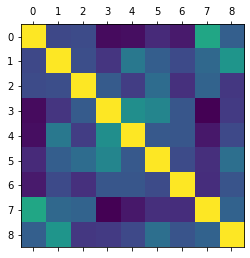

In [37]:
import matplotlib.pyplot as plt

# if using a Jupyter notebook, inlcude:
%matplotlib inline

plt.matshow(correlations)
plt.show()

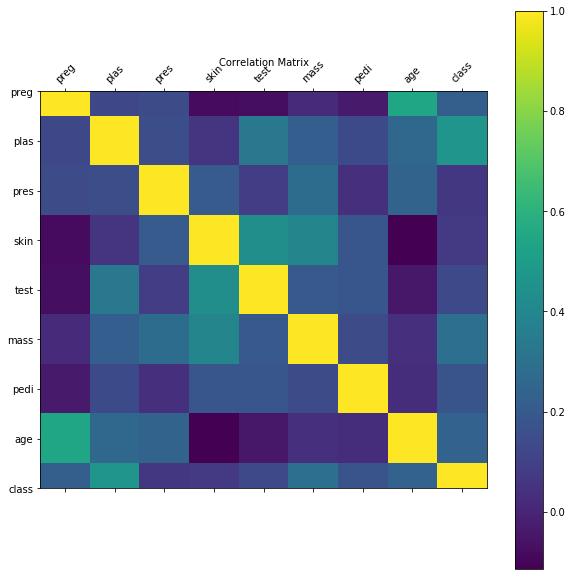

In [56]:
f = plt.figure(figsize=(10, 10))
plt.matshow(correlations, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=10, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10);

In [57]:
import pandas as pd
import numpy as np

# 'RdBu_r' & 'BrBG' are other good diverging colormaps
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1,0.13,0.14,-0.082,-0.074,0.018,-0.034,0.54,0.22
plas,0.13,1,0.15,0.057,0.33,0.22,0.14,0.26,0.47
pres,0.14,0.15,1,0.21,0.089,0.28,0.041,0.24,0.065
skin,-0.082,0.057,0.21,1,0.44,0.39,0.18,-0.11,0.075
test,-0.074,0.33,0.089,0.44,1,0.2,0.19,-0.042,0.13
mass,0.018,0.22,0.28,0.39,0.2,1,0.14,0.036,0.29
pedi,-0.034,0.14,0.041,0.18,0.19,0.14,1,0.034,0.17
age,0.54,0.26,0.24,-0.11,-0.042,0.036,0.034,1,0.24
class,0.22,0.47,0.065,0.075,0.13,0.29,0.17,0.24,1


## 5.7 Skew ('sesgo') of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. <a>Many Machine Learning algorithms assume a Gaussian distribution</a>. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.

In [58]:
# Skew for each attribute
from pandas import read_csv

filename = '.\data\pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


<b>Note</b>. The skew result show a positive (right) or negative (left) skew. <a>Values closer to zero show less skew</a>.

## 5.8 Tips To Remember

This section gives you some tips to remember when reviewing your data using summary statistics.
- <b>Review the numbers</b>. Generating the summary statistics is not enough. Take a moment to pause, read and really think about the numbers you are seeing.

- <b>Ask why</b>. Review your numbers and ask a lot of questions. How and why are you seeing specific numbers. Think about how the numbers relate to the problem domain in general and specific entities that observations relate to.

- <b>Write down ideas</b>. Write down your observations and ideas. Keep a small text file or note pad and jot down all of the ideas for how variables may relate, for what numbers mean, and ideas for techniques to try later. The things you write down now while the data is fresh will be very valuable later when you are trying to think up new things to try.